<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

    Análise de Dados: Análise Exploratória de Dados de Logística II

Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Projeto de Análise de Dados onde foram tratadas as informações fornecidas pela Startup Loggi, empresa de logística.
Dentro desse projeto foram mostrados visualizações gráficas, gerado insights sobre as operações da empresa onde a atuação de foco nesse projetop foi no Destrito Federal de 3 regiões atendidas.

Problemas atendidos com esse projetos:

* Quais as regiões que estão tendo a maior quantidade de entrada?
* A distribuição está equilibrada?

## 2\. Pacotes e bibliotecas

In [ ]:
#Pacotes Nativos Python
import json

#Pacotes Alternativos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import geopy
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
import geopandas
...

Ellipsis

### 2\.1 Arquivos Utilizados

In [ ]:
#Arquivo dos Mapas

!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

replace ./maps/ASB_Cemiterio_A.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
#Data Fram
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

In [ ]:
#Geocodificador CSV

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv

In [ ]:
#Facilitador

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv

## 3\. Exploração de dados

### 3.1 Obter Dados

Carregando os Dados

In [ ]:
with open("deliveries.json") as f:
    data = json.load(f)

In [ ]:
example = data[0]
example

{'name': 'cvrp-2-df-33',
 'region': 'df-2',
 'origin': {'lng': -48.05498915846707, 'lat': -15.83814451122274},
 'vehicle_capacity': 180,
 'deliveries': [{'id': '313483a19d2f8d65cd5024c8d215cfbd',
   'point': {'lng': -48.11618888384239, 'lat': -15.848929154862294},
   'size': 9},
  {'id': '320c94b17aa685c939b3f3244c3099de',
   'point': {'lng': -48.11819489551, 'lat': -15.850772371049631},
   'size': 2},
  {'id': '3663b42f4b8decb33059febaba46d5c8',
   'point': {'lng': -48.11248339849675, 'lat': -15.84787055941764},
   'size': 1},
  {'id': 'e11ab58363c38d6abc90d5fba87b7d7',
   'point': {'lng': -48.11802268617869, 'lat': -15.846471025281456},
   'size': 2},
  {'id': '54cb45b7bbbd4e34e7150900f92d7f4b',
   'point': {'lng': -48.114898174591026, 'lat': -15.85805462185708},
   'size': 7},
  {'id': '71271df40c3188cda88266f9969a5a9',
   'point': {'lng': -48.120447632397045, 'lat': -15.8477803198514},
   'size': 10},
  {'id': 'be0cd4bee278b16f3473c8fb05e96464',
   'point': {'lng': -48.121801874785

É notório que os dados estão brutos, então será necessário uma tratativa intensa desses dados.

In [ ]:
example['region']

'df-2'

Os dados estão agrupados em apenas uma região.

### 3.2 Wragling

In [ ]:
deliveries_df = pd.DataFrame(data) #Definindo os dados brutos como um Data Frame
deliveries_df.head(10) #Imprimindo os 10 primeiros desse Data Frame

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."
5,cvrp-2-df-19,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'f4b64306e4c8185fe4baf332fdfdd22e', 'p..."
6,cvrp-0-df-7,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '6cc90b13f3c4386580f4ca6c6799b2ed', 'p..."
7,cvrp-2-df-26,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '5d8f8d40588819594b3e28cf2993c466', 'p..."
8,cvrp-1-df-5,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': '66ccd3ae2e54b3446f5a230996394f1d', 'p..."
9,cvrp-0-df-74,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '44a85635558f376bb4987e18b9c8dc7', 'po..."


In [ ]:
#"Arrumando" o Data Frame

hub_origin_df = pd.json_normalize(deliveries_df['origin']) #Separando os dicionários de latitude e longitudo dentro do Data Frame
hub_origin_df.head(10) #Imprimindo os 10 primeiros

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145
5,-48.054989,-15.838145
6,-47.802665,-15.657014
7,-48.054989,-15.838145
8,-47.893662,-15.805118
9,-47.802665,-15.657014


In [ ]:
deliveries_df = pd.merge(left = deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True) #Juntando os Data Frames
deliveries_df.head(10) #Imprimindo os 10 primeiros

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145
5,cvrp-2-df-19,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'f4b64306e4c8185fe4baf332fdfdd22e', 'p...",-48.054989,-15.838145
6,cvrp-0-df-7,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '6cc90b13f3c4386580f4ca6c6799b2ed', 'p...",-47.802665,-15.657014
7,cvrp-2-df-26,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '5d8f8d40588819594b3e28cf2993c466', 'p...",-48.054989,-15.838145
8,cvrp-1-df-5,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': '66ccd3ae2e54b3446f5a230996394f1d', 'p...",-47.893662,-15.805118
9,cvrp-0-df-74,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '44a85635558f376bb4987e18b9c8dc7', 'po...",-47.802665,-15.657014


Observação 1: As colunas 'Origin' e 'Deliveries' ainda não estão corretamente alienadas, elas estão em formato de dicionário. Será necessário fazer a tratativa desses dados.

Observação 2: A forma que a Loggi trabalha é sempre padronizando a capacidade de seus veículos, dentro da coluna de 'vehicle_capacity' é visto que todos os veículos abordados são de capacidade máxima de 180 (Obs: o tipo de medida não foi informado)

In [ ]:
deliveries_df = deliveries_df.drop(columns=['origin']) #Removendo a coluna 'origin'
deliveries_df = deliveries_df[['name','region','lng' ,'lat','vehicle_capacity','deliveries']] #Reordenando as colunas
deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)
deliveries_df.head(10) #Imprimindo os 10 primeiros

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."
5,cvrp-2-df-19,df-2,-48.054989,-15.838145,180,"[{'id': 'f4b64306e4c8185fe4baf332fdfdd22e', 'p..."
6,cvrp-0-df-7,df-0,-47.802665,-15.657014,180,"[{'id': '6cc90b13f3c4386580f4ca6c6799b2ed', 'p..."
7,cvrp-2-df-26,df-2,-48.054989,-15.838145,180,"[{'id': '5d8f8d40588819594b3e28cf2993c466', 'p..."
8,cvrp-1-df-5,df-1,-47.893662,-15.805118,180,"[{'id': '66ccd3ae2e54b3446f5a230996394f1d', 'p..."
9,cvrp-0-df-74,df-0,-47.802665,-15.657014,180,"[{'id': '44a85635558f376bb4987e18b9c8dc7', 'po..."


In [ ]:
deliveries_exploded_df = deliveries_df[['deliveries']].explode('deliveries') #Explodir os dados de deliveries
deliveries_exploded_df.head(10) #Imprimindo os 10 primeiros

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."
0,"{'id': '71271df40c3188cda88266f9969a5a9', 'poi..."
0,"{'id': 'be0cd4bee278b16f3473c8fb05e96464', 'po..."
0,"{'id': 'e0fffb7150a2a202adb36e3f2fd5cc96', 'po..."
0,"{'id': '489efb8015b9b9e208d33abae808df23', 'po..."
0,"{'id': 'f4245aa5a08f39b615cfd57a117325ec', 'po..."


In [ ]:
df_normalized = pd.concat([
    pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['size'])).rename(columns={'deliveries': 'deliveries_size'}), #Localizando o Size para renomea-lo
    pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['point']['lng'])).rename(columns={'deliveries': 'deliveries_lng'}), #Localizando o LNG para renomea-lo
    pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['point']['lat'])).rename(columns={'deliveries': 'deliveries_lat'}), #Localizando o LAT para renomea-lo
],axis=1) #Concatenando os Data Frames

df_normalized.head(10)

,deliveries_size,deliveries_lng,deliveries_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055
0,10,-48.120448,-15.847780
0,7,-48.121802,-15.852089
0,10,-48.116300,-15.851215
0,9,-48.116317,-15.849660
0,8,-48.123115,-15.849925


In [ ]:
deliveries_df = deliveries_df.drop(columns=['deliveries']) #Removendo a coluna 'deliveries'
deliveries_df = pd.merge(deliveries_df, df_normalized, how='right', left_index=True, right_index=True) #Concatenando os Data Frames
deliveries_df.reset_index(drop=True, inplace=True) #Redefinindo os indices
deliveries_df.head(10)

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055
5,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,10,-48.120448,-15.847780
6,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.121802,-15.852089
7,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,10,-48.116300,-15.851215
8,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116317,-15.849660
9,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,8,-48.123115,-15.849925


OBS: Os dados do 'name' estão duplicados por conta da função 'explode'

In [ ]:
deliveries_df.drop(['name','region'], axis= 1).select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
deliveries_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


OBS: O desvio padrão da capacidade do veiculo é 0 e a da capacidade do delivery é 5.5

In [ ]:
#Limpando os dados
deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
vehicle_capacity    False
deliveries_size     False
deliveries_lng      False
deliveries_lat      False
dtype: bool

In [ ]:
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [ ]:
categoricos = []
numericos = []
for i in deliveries_df.columns:
  if deliveries_df[i].dtype == 'object':
    categoricos.append(i)
  else:
    numericos.append(i)

#Separando os itens categóricos e numéricos para facilitar a visualização dos dados

In [ ]:
deliveries_df[numericos].describe().T #Visualizar as estatísticas do Data Frame

,count,mean,std,min,25%,50%,75%,max
hub_lng,636149.0,-47.949902,0.091875,-48.054989,-48.054989,-47.893662,-47.893662,-47.802665
hub_lat,636149.0,-15.802359,0.053463,-15.838145,-15.838145,-15.805118,-15.805118,-15.657014
vehicle_capacity,636149.0,180.000000,0.000000,180.000000,180.000000,180.000000,180.000000,180.000000
deliveries_size,636149.0,5.512111,2.874557,1.000000,3.000000,6.000000,8.000000,10.000000
deliveries_lng,636149.0,-47.946087,0.112769,-48.280779,-48.035911,-47.928967,-47.883394,-47.310611
deliveries_lat,636149.0,-15.809492,0.082462,-16.050028,-15.842795,-15.814033,-15.769516,-15.500355


In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   deliveries_size   636149 non-null  int64  
 6   deliveries_lng    636149 non-null  float64
 7   deliveries_lat    636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


Nenhum valor null no Data Frame


## 4\. Manipulação

In [ ]:
df_hub = deliveries_df[['region','hub_lng','hub_lat']] #Separando o dataframe para extrair as regiões através da LNG e LAT
df_hub = df_hub.drop_duplicates().sort_values('region').reset_index(drop=True) #Limpando os dados
df_hub.head()


,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


In [ ]:
gl = Nominatim(user_agent='ebac_geocoder') #Utilizando a API do Geopandas
location = gl.reverse('-15.657013854445248, -47.802664728268745') #Gravando a localização

print(json.dumps(location.raw, indent=2, ensure_ascii=False))


{
  "place_id": 46410411,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 240210480,
  "lat": "-15.656916027876347",
  "lon": "-47.80264463632131",
  "class": "highway",
  "type": "secondary",
  "place_rank": 26,
  "importance": 0.0533433333333333,
  "addresstype": "road",
  "name": "Rua 7",
  "display_name": "Rua 7, Quadra 2, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-127, Brasil",
  "address": {
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "state

Selecionamos uma região específica

In [ ]:
gl = RateLimiter(gl.reverse, min_delay_seconds=1)#Garante que essa API funcione de 1 em 1 segundo

In [ ]:
df_hub ['cordinates'] = df_hub['hub_lat'].astype(str) + ',' + df_hub['hub_lng'].astype(str)
df_hub ['geodata'] = df_hub['cordinates'].apply(gl) #Aplicando o geocoder
df_hub.head()

,region,hub_lng,hub_lat,cordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248,-47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334,-47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274,-48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [ ]:
geodata_df = pd.json_normalize(df_hub['geodata'].apply(lambda x: x.raw)) #Normalizando os dados
geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,46410411,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.053343,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-127,Brasil,br,NaN,NaN,NaN,NaN
1,46401425,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172757199022,-47.893723539491205,highway,residential,26,0.053411,...,Distrito Federal,BR-DF,Região Centro-Oeste,70330-400,Brasil,br,SQS 303,Brasília,NaN,NaN
2,43777060,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.000010,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [ ]:
geodata_df = geodata_df[['address.town', 'address.suburb','address.city','place_rank','type']] #Selecionando as colunas de interesse
geodata_df.rename(columns={'address.town':'hub_town', 'address.suburb':'hub_suburb', 'address.city':'hub_city','place_rank':'hub_rank','type':'hub_type'}, inplace = True) #Renomeando as colunas
geodata_df ['hub_city'] = np.where(geodata_df['hub_city'].notna(), geodata_df['hub_city'], geodata_df['hub_town']) #Preenchendo os valores nulos
geodata_df ['hub_suburb'] = np.where(geodata_df['hub_suburb'].notna(), geodata_df['hub_suburb'], geodata_df['hub_city']) #Preenchendo os valores nulos
geodata_df = geodata_df.drop(columns=['hub_town']) #Removendo a coluna 'hub_town'
geodata_df.head()

<ipython-input-39-37067ee96aa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geodata_df.rename(columns={'address.town':'hub_town', 'address.suburb':'hub_suburb', 'address.city':'hub_city','place_rank':'hub_rank','type':'hub_type'}, inplace = True) #Renomeando as colunas
<ipython-input-39-37067ee96aa9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geodata_df ['hub_city'] = np.where(geodata_df['hub_city'].notna(), geodata_df['hub_city'], geodata_df['hub_town']) #Preenchendo os valores nulos
<ipython-input-39-37067ee96aa9>:4: SettingWithCopyWarning: 
A value 

,hub_suburb,hub_city,hub_rank,hub_type
0,Sobradinho,Sobradinho,26,secondary
1,Asa Sul,Brasília,26,residential
2,Taguatinga,Taguatinga,30,pastry


Juntando os Data Frames

In [ ]:
df_hub = pd.merge(df_hub, geodata_df, left_index=True, right_index=True) #Juntando os Data Frames
df_hub = df_hub[["region", "hub_suburb", "hub_city",'hub_type','hub_rank']]
df_hub.head()

,region,hub_suburb,hub_city,hub_type,hub_rank
0,df-0,Sobradinho,Sobradinho,secondary,26
1,df-1,Asa Sul,Brasília,residential,26
2,df-2,Taguatinga,Taguatinga,pastry,30


In [ ]:
#Juntando o Hub DF com o data frame principal
deliveries_df = pd.merge(deliveries_df, df_hub, how='inner', on='region') #Juntando os Data Frames
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat,hub_suburb,hub_city,hub_type,hub_rank
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929,Taguatinga,Taguatinga,pastry,30
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772,Taguatinga,Taguatinga,pastry,30
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871,Taguatinga,Taguatinga,pastry,30
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471,Taguatinga,Taguatinga,pastry,30
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055,Taguatinga,Taguatinga,pastry,30


OBS: Observe como as regiões são distintas, é necessário analisar cada veículo e se ele suporta esse tipo de terreno para não gerar transtornos durante a entrega dos produtos.

In [ ]:
quantity_by_type = deliveries_df[['hub_type','region']].groupby(['hub_type']).size().reset_index(name='quantity') #Analisando a quantidade de entregas por tipos de área
quantity_by_type

,hub_type,quantity
0,pastry,261319
1,residential,304708
2,secondary,70122


OBS: Dentro dessa tabela é nítido que a variedade dos tipos de área é completamente desbalanceada. Onde as áreas pastry e residential são as mais abundantes e a secundary é completamente inferior

In [ ]:
#Rankeando as HUB's
hub_rank_df = deliveries_df[['hub_rank','region']].sort_values('hub_rank', ascending=True).reset_index(drop=True)
hub_rank_df = hub_rank_df.head(10)
hub_rank_df

,hub_rank,region
0,26,df-1
1,26,df-1
2,26,df-1
3,26,df-1
4,26,df-1
5,26,df-1
6,26,df-1
7,26,df-1
8,26,df-1
9,26,df-1


OBS: A região DF1 domina no quesito de rank

In [ ]:
#Utilizando outro dataset
geodata_df = pd.read_csv('deliveries-geodata.csv') #Lendo o arquivo CSV
geodata_df.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [ ]:
deliveries_df = pd.merge(deliveries_df, geodata_df[['delivery_city','delivery_suburb']], how='inner', left_index=True, right_index=True) #Juntando os Data Frames
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat,hub_suburb,hub_city,hub_type,hub_rank,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929,Taguatinga,Taguatinga,pastry,30,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772,Taguatinga,Taguatinga,pastry,30,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871,Taguatinga,Taguatinga,pastry,30,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471,Taguatinga,Taguatinga,pastry,30,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055,Taguatinga,Taguatinga,pastry,30,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


### 4.1 Qualidade

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   deliveries_size   636149 non-null  int64  
 6   deliveries_lng    636149 non-null  float64
 7   deliveries_lat    636149 non-null  float64
 8   hub_suburb        636149 non-null  object 
 9   hub_city          636149 non-null  object 
 10  hub_type          636149 non-null  object 
 11  hub_rank          636149 non-null  int64  
 12  delivery_city     634447 non-null  object 
 13  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 67.9+ MB


In [ ]:
deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
vehicle_capacity    False
deliveries_size     False
deliveries_lng      False
deliveries_lat      False
hub_suburb          False
hub_city            False
hub_type            False
hub_rank            False
delivery_city        True
delivery_suburb      True
dtype: bool

In [ ]:
100 * deliveries_df.isna().sum() / len(deliveries_df)

name                 0.000000
region               0.000000
hub_lng              0.000000
hub_lat              0.000000
vehicle_capacity     0.000000
deliveries_size      0.000000
deliveries_lng       0.000000
deliveries_lat       0.000000
hub_suburb           0.000000
hub_city             0.000000
hub_type             0.000000
hub_rank             0.000000
delivery_city        0.267547
delivery_suburb     25.133263
dtype: float64

In [ ]:
df_prop = deliveries_df[['delivery_city']].value_counts() / len(deliveries_df)
df_prop.sort_values(ascending=False).head(10)

delivery_city       
Brasília                0.234195
Taguatinga              0.071625
Sudoeste / Octogonal    0.069504
Ceilândia               0.059661
Águas Claras            0.058293
Guará                   0.055619
Lago Sul                0.045620
Sobradinho              0.045412
Lago Norte              0.040832
Gama                    0.034880
Name: count, dtype: float64

OBS: São as regiões que compões Brasília.

## 5\. Visualização

In [ ]:
map = geopandas.read_file('distrito-federal.shp')
map = map.loc[[0]]#Pegando o primeiro elemento
map.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


In [ ]:
df_hub = deliveries_df[['region','hub_lng','hub_lat']].drop_duplicates().reset_index(drop=True) #Separando o dataframe para extrair as regiões através da LNG e LAT
geo_hub_df = geopandas.GeoDataFrame(df_hub, geometry=geopandas.points_from_xy(df_hub['hub_lng'], df_hub['hub_lat'])) #Criando o GeoDataFrame
geo_hub_df.head()

,region,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


In [ ]:
geo_deliveries_df = geopandas.GeoDataFrame(deliveries_df, geometry=geopandas.points_from_xy(deliveries_df['deliveries_lng'], deliveries_df['deliveries_lat'])) #Criando o GeoDataFrame
geo_deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat,hub_suburb,hub_city,hub_type,hub_rank,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929,Taguatinga,Taguatinga,pastry,30,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772,Taguatinga,Taguatinga,pastry,30,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871,Taguatinga,Taguatinga,pastry,30,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471,Taguatinga,Taguatinga,pastry,30,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055,Taguatinga,Taguatinga,pastry,30,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)


Começando a criar as visualizações

<ipython-input-71-eb665b918dba>:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


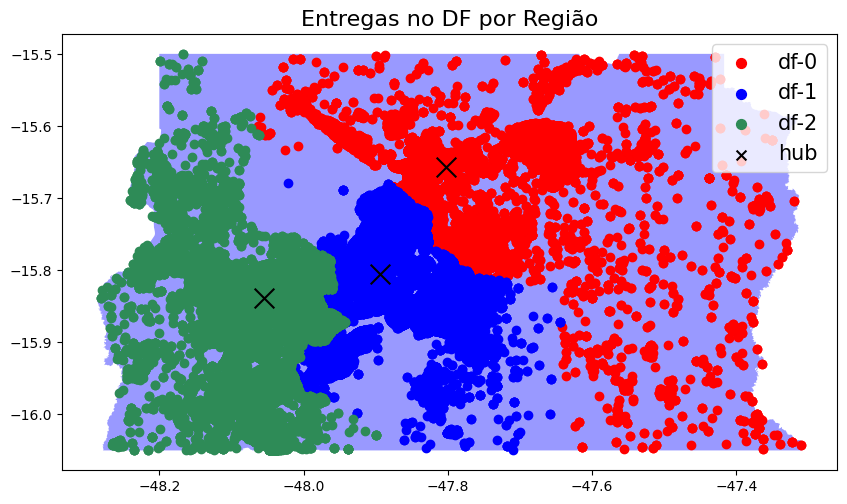

In [ ]:
fig, ax= plt.subplots(figsize = (10,10))

map.plot(ax=ax, alpha=0.4, color='blue')

geo_deliveries_df.query('region == "df-0"').plot(ax=ax, color='red', label='df-0')
geo_deliveries_df.query('region == "df-1"').plot(ax=ax, color='blue', label='df-1')
geo_deliveries_df.query('region == "df-2"').plot(ax=ax, color='seagreen', label='df-2')

geo_hub_df.plot(ax=ax, color='black', markersize=200,marker='x',label='hub')

plt.title('Entregas no DF por Região', fontdict={'fontsize': 16})
lgnd = plt.legend(prop = { 'size': 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

De acordo com o gráfico é notório que a região DF-1 é mais concentrada em uma área e menos destribuida do que as outras. Logo a demanda sobre essas encomendas pode ser alta, gerando custos adicionais do que os outros HUBs.

[Text(0.5, 1.0, 'Quantidade de entregas por Região'),
 Text(0.5, 0, 'Região'),
 Text(0, 0.5, 'Porcentagem')]

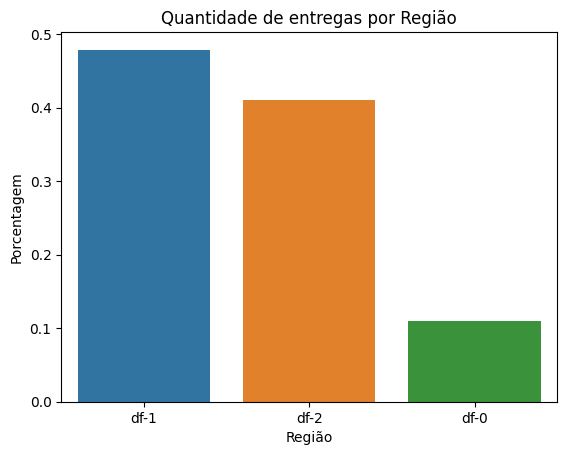

In [ ]:
#Gerando gráfico de entregas por região
qntd_df = deliveries_df[['region']].value_counts(normalize=True).reset_index()
qntd_df.head(3)

grafic = sns.barplot(data=qntd_df, x='region', y='proportion',hue='region')
grafic.set(title='Quantidade de entregas por Região', xlabel='Região', ylabel='Porcentagem')



No gráfico acima, vemos as proporções de entrega por região e nos deparamos com a baixa taxa do df-0, sendo assim, por ser uma área que não demanda tantos recursos como veículos por exemplo, pode ser possível repensar a forma de logística na área. Distribuindo melhor suas áreas de administrações.